In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [3]:
#const
lr_ = 0.01 #learning rate

# Titanic Dataset

In [4]:
url = 'https://raw.githubusercontent.com/st119848/dataset/master/titanic_train.csv'
df = pd.read_csv(url)

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.00,1,0,2926,26.0000,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.00,0,0,PC 17485,56.9292,E36,C
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S


In [7]:
df.iloc[:,5].fillna(value=df.iloc[:,5].mean(), inplace=True)

In [8]:
df = df.replace(["male", "female"], [0, 1])

In [9]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
764,765,0,3,"Eklund, Mr. Hans Linus",0,16.000000,0,0,347074,7.775,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",0,29.000000,1,0,113776,66.600,C2,S
168,169,0,1,"Baumann, Mr. John D",0,29.699118,0,0,PC 17318,25.925,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",0,21.000000,0,0,54636,16.100,NaN,S
46,47,0,3,"Lennon, Mr. Denis",0,29.699118,1,0,370371,15.500,NaN,Q


In [10]:
y = df.iloc[:,[1]]
interest_columns = df.columns[[4,5,9]]
col_num = len(interest_columns)
X = df[interest_columns]

In [11]:
X.sample(5)

,Sex,Age,Fare
631,0,51.0,7.0542
713,0,29.0,9.4833
543,0,32.0,26.0000
651,1,18.0,23.0000
867,0,31.0,50.4958


In [12]:
y = y.astype(np.float32).values
X = X.astype(np.float32).values

In [13]:
print(X.shape)
print(y.shape)

(891, 3)
(891, 1)


In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state = 100)

In [16]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(569, 3) (569, 1) (143, 3) (143, 1) (179, 3) (179, 1)


In [17]:
np.random.seed(2)
model = Sequential()

model.add(Dense(2, input_shape=(col_num,)))
model.add(Activation("linear"))

model.add(Dense(2))
model.add(Activation("relu"))

output_num = 1 # One value representing if the passenger survived
model.add(Dense(output_num))
model.add(Activation("sigmoid"))

In [18]:
model.compile(optimizer=Adam(lr=lr_),loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=400, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/400
18/18 [==============================] - 0s 9ms/step - loss: 0.6361 - accuracy: 0.6467 - val_loss: 0.6465 - val_accuracy: 0.5874
Epoch 2/400
18/18 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6344 - val_loss: 0.6350 - val_accuracy: 0.5874
Epoch 3/400
18/18 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.6344 - val_loss: 0.6326 - val_accuracy: 0.5874
Epoch 4/400
18/18 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7083 - val_loss: 0.6295 - val_accuracy: 0.7203
Epoch 5/400
18/18 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7979 - val_loss: 0.6192 - val_accuracy: 0.7203
Epoch 6/400
18/18 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.8032 - val_loss: 0.6206 - val_accuracy: 0.7203
Epoch 7/400
18/18 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8032 - val_loss: 0.6115 - val_accuracy: 0.7203
Epoch 8/400
1

In [20]:
y_predict = np.round(model.predict(X_test))

In [21]:
np.sum(y_test == y_predict)/y_test.shape[0]

0.7932960893854749

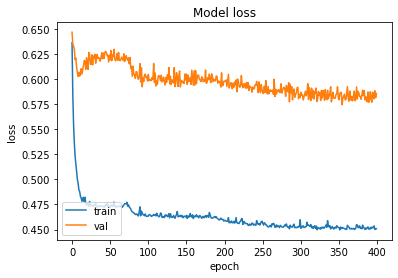

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

#Pima Indians Diabetes Dataset (pid)

In [23]:
url = 'https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv'
df_pid = pd.read_csv(url)

In [24]:
df_pid.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2,88,74,19,53,29.0,0.229,22,0
251,2,129,84,0,0,28.0,0.284,27,0
631,0,102,78,40,90,34.5,0.238,24,0
757,0,123,72,0,0,36.3,0.258,52,1
689,1,144,82,46,180,46.1,0.335,46,1


In [25]:
df_pid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df_pid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
for i in range(5):
  df_pid.iloc[:,i+1].replace(0,df_pid.iloc[:,i+1].mean(),inplace = True)

In [28]:
df_pid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
y = df_pid.iloc[:,[8]]
interest_columns = df_pid.columns[0:8]
col_num = len(interest_columns)
X = df_pid[interest_columns]

In [30]:
X.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
165,6,104.0,74.0,18.000000,156.000000,29.9,0.722,41
298,14,100.0,78.0,25.000000,184.000000,36.6,0.412,46
239,0,104.0,76.0,20.536458,79.799479,18.4,0.582,27
143,10,108.0,66.0,20.536458,79.799479,32.4,0.272,42
434,1,90.0,68.0,8.000000,79.799479,24.5,1.138,36


In [31]:
y = y.astype(np.float32).values
X = X.astype(np.float32).values

In [32]:
print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


In [33]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state = 100)

In [35]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(491, 8) (491, 1) (123, 8) (123, 1) (154, 8) (154, 1)


In [36]:
np.random.seed(2)
model = Sequential()

model.add(Dense(2, input_shape=(col_num,)))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("relu"))

output_num = 1 # One value representing if the passenger survived
model.add(Dense(output_num))
model.add(Activation("sigmoid"))

In [37]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=Adam(lr=lr_))

In [38]:
history = model.fit(X_train, y_train, epochs=400, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/400
16/16 [==============================] - 0s 8ms/step - loss: 0.6741 - accuracy: 0.6314 - val_loss: 0.6206 - val_accuracy: 0.7236
Epoch 2/400
16/16 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6314 - val_loss: 0.6070 - val_accuracy: 0.7236
Epoch 3/400
16/16 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6314 - val_loss: 0.5999 - val_accuracy: 0.7236
Epoch 4/400
16/16 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.6314 - val_loss: 0.5943 - val_accuracy: 0.7236
Epoch 5/400
16/16 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6314 - val_loss: 0.5828 - val_accuracy: 0.7236
Epoch 6/400
16/16 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6314 - val_loss: 0.5705 - val_accuracy: 0.7236
Epoch 7/400
16/16 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6314 - val_loss: 0.5537 - val_accuracy: 0.7236
Epoch 8/400
1

In [39]:
y_predict = np.round(model.predict(X_test))

In [40]:
np.sum(y_test == y_predict)/y_test.shape[0]

0.7077922077922078

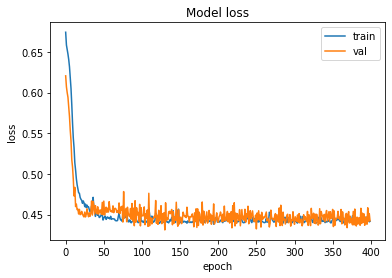

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

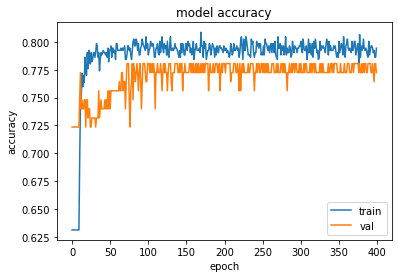

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.title('model accuracy')
plt.show()

# MNIST Dataset (m)

In [43]:
from keras.datasets import mnist

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


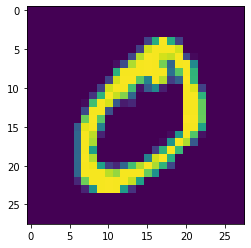

In [46]:
element = 1
plt.imshow(X_train[element])
plt.show()

In [47]:
X_train = X_train.reshape((-1, 28*28)) 
X_test = X_test.reshape((-1, 784))

In [48]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [50]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state = 100)

In [51]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [52]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val,y_val)

(48000, 784) (48000, 10) (10000, 784) (10000, 10) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [53]:
np.random.seed(2)
model = Sequential()

model.add(Dense(2, input_shape=(784,)))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("relu"))

output_num = 10 # One value representing if the passenger survived
model.add(Dense(output_num))
model.add(Activation("sigmoid"))

In [54]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=Adam(lr=lr_))

In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3088 - accuracy: 0.2121 - val_loss: 0.2755 - val_accuracy: 0.3045
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.3108 - val_loss: 0.2716 - val_accuracy: 0.3262
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.3320 - val_loss: 0.2704 - val_accuracy: 0.3442
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2695 - accuracy: 0.3442 - val_loss: 0.2672 - val_accuracy: 0.3446
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.3517 - val_loss: 0.2677 - val_accuracy: 0.3594
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.3549 - val_loss: 0.2669 - val_accuracy: 0.3497
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2658 - accuracy: 0.3550 - val_loss: 0.2666 - val_ac

In [56]:
y_predict = np.round(model.predict(X_test))

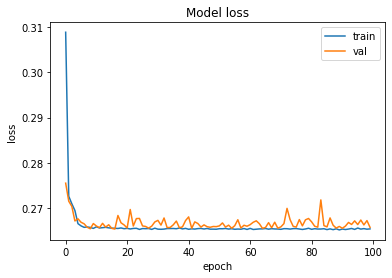

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

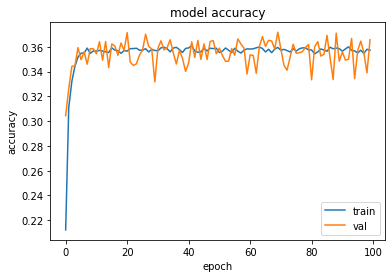

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.title('model accuracy')
plt.show()